In [1]:
import pandas as pd
DF= pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
DF.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


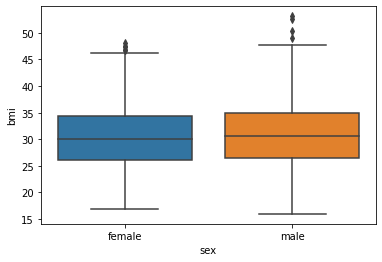

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(DF.sex, DF.bmi)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


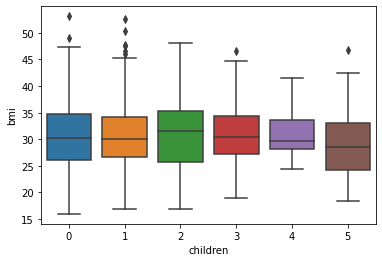

In [15]:
sns.boxplot(DF.children, DF.bmi)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


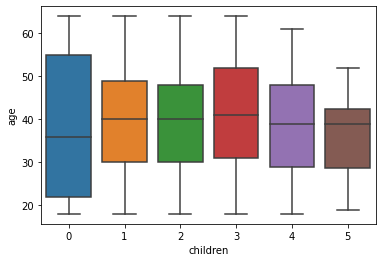

In [16]:
sns.boxplot(DF.children, DF.age)
plt.show()

In [3]:
DF1 = DF[['expenses', 'age', 'bmi', 'children']]
DF1.head()

,expenses,age,bmi,children
0,16884.92400,19,27.900,0
1,1725.55230,18,33.770,1
2,4449.46200,28,33.000,3
3,21984.47061,33,22.705,0
4,3866.85520,32,28.880,0


In [18]:
from sklearn.model_selection import train_test_split
X = DF1[['age', 'bmi', 'children']]
y = DF1['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape )

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


In [36]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize=True, n_jobs=-1)
MR.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

MR_mse = mean_squared_error(y_test, MR.predict(X_test))
MR_mse

114300134.03204554

In [22]:
from sklearn.linear_model import LinearRegression

MR1 = LinearRegression(n_jobs=-1)
MR1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR1.predict(X_test))

114300134.03204553

In [37]:
from sklearn.linear_model import Ridge

RG = Ridge(normalize = True, alpha=0.3, solver='cholesky')
RG.fit(X_train, y_train)

RG_mse=mean_squared_error(y_test, RG.predict(X_test))
RG_mse

113578068.78448391

In [38]:
from sklearn.linear_model import Lasso

LS = Lasso(normalize=True, alpha=0.2)
LS.fit(X_train, y_train)

LS_mse = mean_squared_error(y_test, LS.predict(X_test))
LS_mse 

114279766.62560357

In [39]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5, criterion='mse')
DTR.fit(X_train, y_train)

DTR_mse = mean_squared_error(y_test, DTR.predict(X_test))
DTR_mse 

140107489.79228327

In [29]:
DTR.feature_importances_

array([0.45047558, 0.48298996, 0.06653445])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


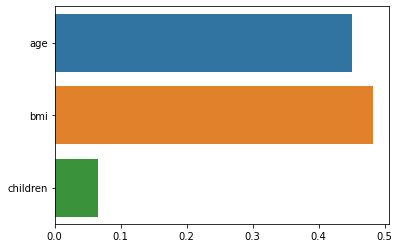

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(DTR.feature_importances_, ['age','bmi','children'])
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=1, criterion='mse', n_jobs=-1, random_state=2045)
RFR.fit(X_train, y_train)

RFR_mse = mean_squared_error(y_test, RFR.predict(X_test))
RFR_mse 

114282870.90114409

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


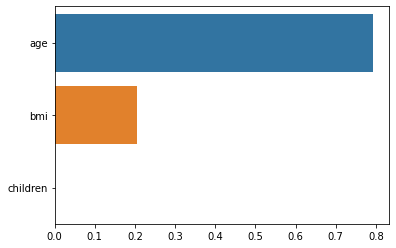

In [32]:
sns.barplot(RFR.feature_importances_,['age','bmi','children'] )
plt.show()

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss='ls', n_estimators=9000, learning_rate=0.0001, criterion='mse', max_features=3, max_depth=1)
GBR.fit(X_train, y_train)

GBR_mse = mean_squared_error(y_test, GBR.predict(X_test))
GBR_mse 

118523943.40353537

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


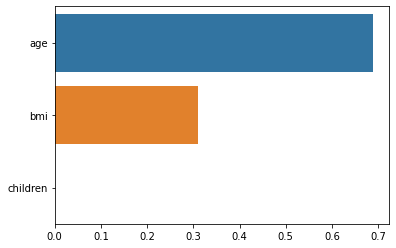

In [34]:
sns.barplot(GBR.feature_importances_, ['age','bmi','children'])
plt.show()

In [43]:
from xgboost import XGBRegressor
XGB = XGBRegressor(booster='gblinear', n_estimators=100, learning_rate=0.4, reg_lambda=3.0, n_jobs=-1)
XGB.fit(X_train, y_train)

XGB_mse = mean_squared_error(y_test, XGB.predict(X_test))
XGB_mse

[12:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


112752490.57995765

In [46]:
from lightgbm import LGBMRegressor

LGB = LGBMRegressor(linear_tree = True, boosting_type='gbdt', objective='regression',
                    n_estimators=500, learning_rate=0.001, max_depth=2, n_jobs=-1)
LGB.fit(X_train, y_train)

LGB_mse = mean_squared_error(y_test, LGB.predict(X_test))
LGB_mse

119555446.90396042

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


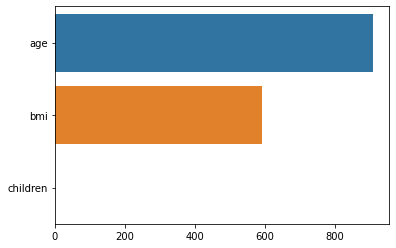

In [47]:
sns.barplot(LGB.feature_importances_, ['age','bmi','children'])
plt.show()

In [66]:
a = [MR_mse, RG_mse, LS_mse , DTR_mse , RFR_mse , GBR_mse ,XGB_mse, LGB_mse]
Mode_type = ('MR','RG','LS','DTR','RFR','GBR','XGB','LGB')
mse = []
for i in a :
  print(i)
  mse.append(i)

114300134.03204554
113578068.78448391
114279766.62560357
140107489.79228327
114282870.90114409
118523943.40353537
112752490.57995765
119555446.90396042


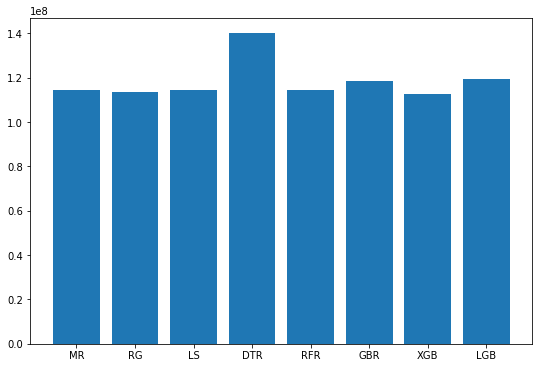

In [74]:
plt.figure(figsize=(9,6))
plt.bar(Mode_type, mse)
#plt.ylim(1.0, 1.5)
plt.show()